# Introducción

En esta práctica vamos a repasar diferentes tests estadísticos. Para ello nos ayudamos de los datos publicados por BCSC:
*NCI-funded Breast Cancer Surveillance Consortium (P01 CA154292 and HHSN261201100031C). Downloaded mm/dd/yyyy from the Breast Cancer Surveillance Consortium Web site - http://www.bcsc-research.org/data/index.html.*

Concretamente a través de este enlace:
http://www.bcsc-research.org/data/rf/app2/DownloadRequest.aspx


El fichero *BCSC_risk_factors_summarized.csv* descargado lo teneis en la carpeta *data*.

Ese fichero es un CSV, la descripción de cada columna se puede ver en la siguiente tabla:


| Nombre de variable | Descripción | Código | 
|-|-|-|
| year | Año de la observación | Numérico, 2000-2009 |
| year_group_5_years| Edad (años) en grupos de 5 años |  1 = Edad 18-29;  2 = Edad 30-34; 3 = Edad 35-39; 4 = Edad 40-44; 5 = Edad 45-49; 6 = Edad 50-54; 7 = Edad 55-59; 8 = Edad 60-64; 9 = Edad 65-69; 10 = Edad 70-74; 11 = Edad 75-79; 12 = Edad 80-84; 13 = Edad ≥85 |
| race_eth | Grupo étnico | 1 = Non-Hispanic white; 2 = Non-Hispanic black; 3 = Asian/Pacific Islander; 4 = Native American; 5 = Hispanic; 6 = Other/mixed; 9 = Desconocido |
| first_degree_hx | Historial de cancer de un familiar de primer grado | 0 = No; 1 = Sí; 9 = Desconocido |
| Edad_menarche | Edad (años) at menarche |0 = Edad ≥14; 1 = Edad 12-13; 2 = Edad <12; 9 = Desconocido
| Edad_first_birth | Edad (años) at first birth | 0 = Edad < 20; 1 = Edad 20-24; 2 = Edad 25-29; 3 = Edad ≥30; 4 = Nulliparous; 9 = Desconocido |
| BIRADS_breast_density | BI-RADS densidad del cancer de pecho| 1 = Almost entirely fat; 2 =Scattered fibroglandular densities; 3 = Heterogeneously dense; 4 = Extremely dense; 9 = Desconocido |
| current_hrt | Uso de terapia de hormonas de reemplazo | 0 = No; 1 = Sí; 9 = Desconocido |
| menopaus | Menopausal status | 1 = Pre- or peri-menopausal; 2 = Post-menopausal; 3 = Surgical menopause; 9 = Desconocido |
| bmi_group |  Body mass index | 1 = 10-24.99; 2 = 25-29.99; 3 = 30-34.99; 4 = 35 or more; 9 = Desconocido |
| biophx | Biopsia previa o aspiración | 0 = No; 1 = Sí; 9 = Desconocido |
| breast_cancer_history | Cancer diagnosticado con anterioridad | 0 = No; 1 = Sí; 9 = Desconocido |
| count | Número de ocurrencias de estas covariables | Numérico|




Leemos los datos del csv y los adaptamos. Pasos a seguir:
1. Replicamos las filas indicadas por la columna *count*
2. Los datos son muy grandes, para agilizar la práctica nos quedamos con 5000 muestras elegidas con muestreo aleatorio simple. El resto se puede descartar.
3. Se adapta el resto

In [1]:
#Cargamos
BCSC<-read.csv("./datos/BCSC_risk_factors_summarized.csv", sep = ",")
head(BCSC)

year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
2000,1,1,0,0,0,1,0,1,3,0,0,1
2000,1,1,0,0,1,3,0,1,2,0,0,1
2000,1,1,0,0,1,4,0,1,1,0,0,2
2000,1,1,0,0,2,3,0,1,1,0,0,1
2000,1,1,0,0,2,3,0,1,1,1,9,1
2000,1,1,0,0,4,9,0,1,1,0,0,1


In [2]:
#Replicamos
BCSC<-BCSC[rep(row.names(BCSC),times=BCSC$count),]
dim(BCSC)


[1] 6318638      13

El número de filas tras replicar las filas indicadas por la columna *count* es de 6318638. Como este número es muy alto para la máquina virtual que tenemos vamos a realizar una muestreo aleatorio simple y nos quedaremos con 5000 filas. El resto se descartan.

*Nota:*Para el muestreo usad la semilla 12345, de esta forma todos tendresmos exactamente los mismos resultados.

In [3]:
#Definimos una semilla común para todos:
set.seed(12345)
#Utiliza muestreo aleatorio simple para quedarnos con 5000 muestras:
subset<-sample(1:nrow(BCSC),size=5000, replace=F)
BCSC_subset<-BCSC[subset,]
head(BCSC_subset)

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
792997.89,2006,8,9,9,9,9,2,9,2,9,0,0,218
986739.194,2008,7,2,0,9,9,2,0,2,9,0,0,771
845393.799,2007,5,1,0,9,9,2,0,1,9,0,0,877
996805.11,2008,8,1,1,1,1,2,0,2,2,0,0,32
481428.71,2004,3,1,0,9,9,3,0,1,2,0,0,97
169906.1,2001,6,5,0,9,9,1,1,2,3,0,0,11


Formatear el dataframe:
* Cambiamos los *Desconocido* por NA en las columnas "race_eth", "first_degree_hx", "age_menarche", "age_first_birth", "BIRADS_breast_density", "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history"
* Convertimos a factores las columnas que vamos a necesitar

In [4]:
#Ponemos NA en los valores desconocidos (siempre toman el valor de 9, según el encabezado)
for(i in 3:ncol(BCSC_subset)-1)
    BCSC_subset[,i][which(BCSC_subset[,i]==9)]<-NA

#convertimos a factor las columnas que lo requieren
BCSC_subset$first_degree_hx<-factor(BCSC_subset$first_degree_hx,labels=c("No","Yes"))
BCSC_subset$BIRADS_breast_density<-factor(BCSC_subset$BIRADS_breast_density,labels=c("Almost Entirely Fat","Scattered fibroglandular densities",
                                                                                     "Heterogeneously dense","Extremely Dense"))
BCSC_subset$current_hrt<-factor(BCSC_subset$current_hrt,labels=c("No","Yes"))
BCSC_subset$menopaus<-factor(BCSC_subset$menopaus,labels=c("Pre-or peri-menopausal","Post-menopausal","Surgical menopause"))
BCSC_subset$biophx<-factor(BCSC_subset$biophx,labels=c("No","Yes"))
BCSC_subset$breast_cancer_history<-factor(BCSC_subset$breast_cancer_history,labels=c("No","Yes"))

#Visualizamos    
head(BCSC_subset)

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
792997.89,2006,8,NA,NA,NA,NA,Scattered fibroglandular densities,NA,Post-menopausal,NA,No,No,218
986739.194,2008,7,2,No,NA,NA,Scattered fibroglandular densities,No,Post-menopausal,NA,No,No,771
845393.799,2007,5,1,No,NA,NA,Scattered fibroglandular densities,No,Pre-or peri-menopausal,NA,No,No,877
996805.11,2008,8,1,Yes,1,1,Scattered fibroglandular densities,No,Post-menopausal,2,No,No,32
481428.71,2004,3,1,No,NA,NA,Heterogeneously dense,No,Pre-or peri-menopausal,2,No,No,97
169906.1,2001,6,5,No,NA,NA,Almost Entirely Fat,Yes,Post-menopausal,3,No,No,11


#### Edad y Antecedentes familiares

Creamos una nueva columna con la edad estimada para un posterior análisis

Representa en un diagrama de cajas cómo varía la **edad de aparición del cancer** en función de si ha habido **antecedentes familiares** o no.
Ayuda:
- Hay que crear una nueva columna con la edad estimada de cada rango.

Warning message:
“Removed 448 rows containing non-finite values (stat_boxplot).”

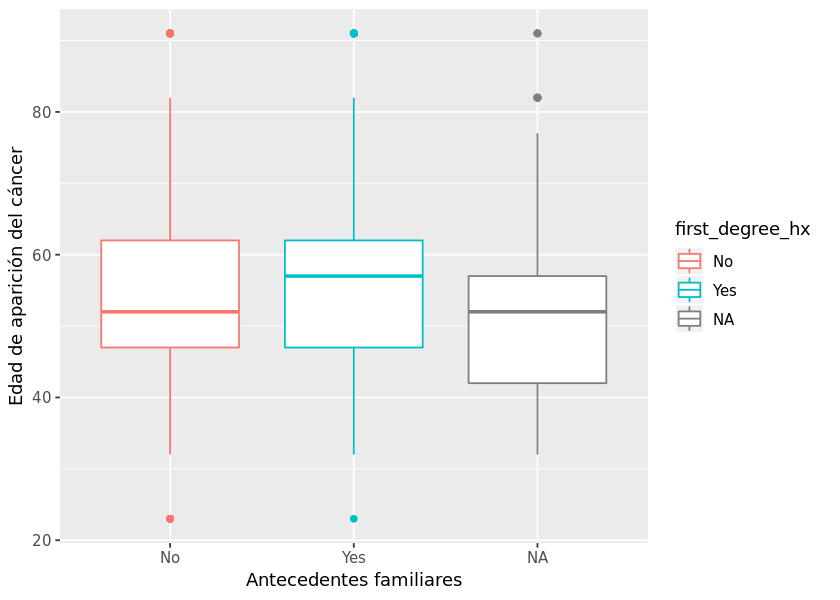

In [5]:
#Creamos un listado de valores medios de los rangos de cada edad (elegimos 91 al final por igualar la distancia entre
#los dos primeros y los dos últimos, entiendo que es un poco arbitrario...)
avg_ages<-c(23,32,37,42,47,52,57,62,67,72,77,82,91)
BCSC_subset$avg_ages<-avg_ages[BCSC_subset$age_group_5_years]
library("ggplot2")
options(repr.plot.height=5,repr.plot.width=7)
ggplot(BCSC_subset,aes(x=first_degree_hx,y=avg_ages,color=first_degree_hx, na.rm=T))+
geom_boxplot()+xlab("Antecedentes familiares")+ylab("Edad de aparición del cáncer")
#No sé cómo eliminar la caja del NA..... Entiendo que na.rm=T debería haberla eliminado......


¿Existe una diferencia estadística significativa entre la edad de aparición del cancer y si hay antecedentes familiares? ¿Que test usarías para comprobarlo?

In [6]:
#Lo primero que tenemos que hacer es hacer dos series con las edades de los pacientes, una con los que tienen antecedentes 
#y otra con los que no. Sobre ellas, hay que pasar un test de Shapiro, para ver si se distribuyen normalmente
FirstDegree_Y<- BCSC_subset$avg_ages[BCSC_subset$first_degree_hx=="Yes"]
FirstDegree_N<- BCSC_subset$avg_ages[BCSC_subset$first_degree_hx=="No"]
shapiro.test(FirstDegree_Y)
shapiro.test(FirstDegree_N)


	Shapiro-Wilk normality test

data:  FirstDegree_Y
W = 0.94602, p-value = 8.642e-15



	Shapiro-Wilk normality test

data:  FirstDegree_N
W = 0.93452, p-value < 2.2e-16


In [7]:
#Usando p-value = 0.05 como umbral para descartar la hipótesis nula, este test nos lleva a descartar normalidad
#Aplicamos entonces el test de Wilcoxon-Mann-Whitney para analizar si las muestras provienen de la misma distribución
wilcox.test(FirstDegree_Y,FirstDegree_N)
print("#Usando p-value = 0.05 como umbral para descartar la hipótesis nula, este test nos lleva a descartar la hipótesis nula. 
Por tanto, podemos afirmar que no provienen de la misma distribución; es decir, tienen diferencia estadística significativa")


	Wilcoxon rank sum test with continuity correction

data:  FirstDegree_Y and FirstDegree_N
W = 1261900, p-value = 4.367e-06
alternative hypothesis: true location shift is not equal to 0


[1] "#Usando p-value = 0.05 como umbral para descartar la hipótesis nula, este test nos lleva a descartar la hipótesis nula. \nPor tanto, podemos afirmar que no provienen de la misma distribución; es decir, tienen diferencia estadística significativa"


Dibuja la curva de densidad de probabilidad de cómo varía la edad de aparición del cancer en función de si ha habido antecedentes familiares o no.

Warning message:
“Removed 448 rows containing non-finite values (stat_density).”

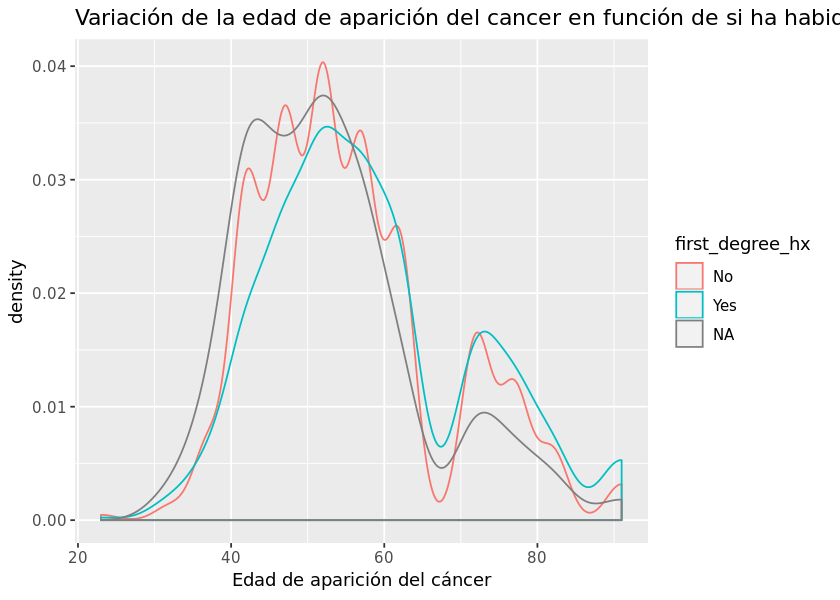

In [8]:
ggplot(BCSC_subset,aes(x=avg_ages,color=first_degree_hx, na.rm=T))+
geom_density()+xlab("Edad de aparición del cáncer")+
ggtitle("Variación de la edad de aparición del cancer en función de si ha habido antecedentes familiares o no")

#Estamos en las mismas que arriba!! Supongo que podría quitar los NA del DF antes de pintar, pero no entiendo por qué pasa 
#esto cuando le digo que no considere los NA???


#### Edad y BIRADS

Representa en un diagrama de cajas cómo varía la edad de aparición del cancer en función de la densidad del cancder (BIRADS).

Warning message:
“Removed 336 rows containing non-finite values (stat_boxplot).”

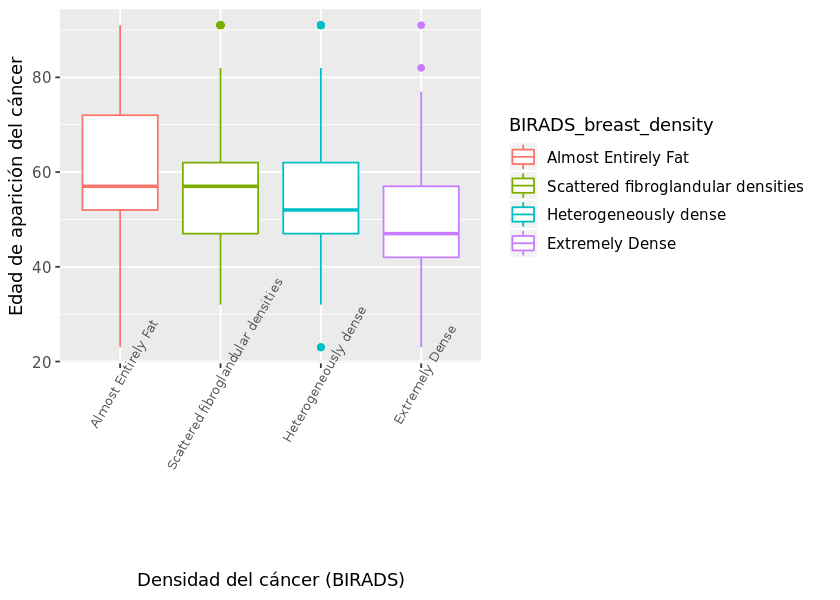

In [9]:
#Como veo que me va a pasar lo de antes, en adelante quitaré los NA en el DF que use, dado que no se me ocurre otra forma
BCSC_subset_BIRADS<-BCSC_subset[!is.na(BCSC_subset$BIRADS_breast_density),]

ggplot(BCSC_subset_BIRADS,aes(x=BIRADS_breast_density,y=avg_ages,color=BIRADS_breast_density))+
geom_boxplot()+xlab("Densidad del cáncer (BIRADS)")+ylab("Edad de aparición del cáncer")+
theme(axis.text.x = element_text(angle=60,size=8))


¿Existe una evidencia estadística significativa para decir que la edad en la que se detecta el cancer depende de la densidad del cancer (BIRADS)?

¿Que test habría que aplicar?

In [10]:
#Como en el anterior, lo primero es hacer cuatro series con las edades de los pacientes, una con cada tipo de cáncer. 
#Sobre ellas, hay que pasar un test de Shapiro, para ver si se distribuyen normalmente
Type_1<- BCSC_subset_BIRADS$avg_ages[BCSC_subset_BIRADS$BIRADS_breast_density=="Almost Entirely Fat"]
Type_2<- BCSC_subset_BIRADS$avg_ages[BCSC_subset_BIRADS$BIRADS_breast_density=="Scattered fibroglandular densities"]
Type_3<- BCSC_subset_BIRADS$avg_ages[BCSC_subset_BIRADS$BIRADS_breast_density=="Heterogeneously dense"]
Type_4<- BCSC_subset_BIRADS$avg_ages[BCSC_subset_BIRADS$BIRADS_breast_density=="Extremely Dense"]

shapiro.test(Type_1)
shapiro.test(Type_2)
shapiro.test(Type_3)
shapiro.test(Type_4)


	Shapiro-Wilk normality test

data:  Type_1
W = 0.95982, p-value = 1.134e-06



	Shapiro-Wilk normality test

data:  Type_2
W = 0.93957, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  Type_3
W = 0.92603, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  Type_4
W = 0.91856, p-value = 2.109e-10


In [11]:
#Usando p-value = 0.05 como umbral para descartar la hipótesis nula, este test nos lleva a descartar normalidad
#Aplicamos entonces el test de Kruskal-Wallis
kruskal.test(avg_ages~BIRADS_breast_density,data=BCSC_subset_BIRADS)
print("#Usando p-value = 0.05 como umbral para descartar la hipótesis nula, este test nos lleva a descartar la hipótesis nula. 
Por tanto, podemos afirmar que no provienen de la misma distribución; es decir, tienen diferencia estadística significativa")



	Kruskal-Wallis rank sum test

data:  avg_ages by BIRADS_breast_density
Kruskal-Wallis chi-squared = 136.63, df = 3, p-value < 2.2e-16


[1] "#Usando p-value = 0.05 como umbral para descartar la hipótesis nula, este test nos lleva a descartar la hipótesis nula. \nPor tanto, podemos afirmar que no provienen de la misma distribución; es decir, tienen diferencia estadística significativa"


#### Tablas de contingencia: BIRADS

¿Todos los  tipos de cancer (BIRADS) son igual de probables? ¿Con que test lo comprobarías?

In [12]:
#Necesitamos crear una tabla de contingencia para responder a todas las preguntas desde aquí:
frequency<-table(BCSC_subset_BIRADS$BIRADS_breast_density)
#El test apropiado para estudiar si siguen la misma distribución es el de chi cuadrado
chi_squared <- chisq.test(frequency)
chi_squared
print("Usando p-value = 0.05 como umbral para descartar la hipótesis nula, este test nos lleva a descartar la hipótesis nula. 
Por tanto, no son igual de probables, no son independientes")



	Chi-squared test for given probabilities

data:  frequency
X-squared = 1816.3, df = 3, p-value < 2.2e-16


[1] "Usando p-value = 0.05 como umbral para descartar la hipótesis nula, este test nos lleva a descartar la hipótesis nula. \nPor tanto, no son igual de probables, no son independientes"


¿Cual es el tipo de cancer (BIRADS) más común? ¿Con qué proporción?

In [13]:
frequency


               Almost Entirely Fat Scattered fibroglandular densities 
                               297                               1665 
             Heterogeneously dense                    Extremely Dense 
                              1451                                256 

In [14]:
print(paste("El tipo de cáncer más común es el Scattered fibroglandular densities, con una proporción de ", 
            100*max(frequency)/nrow(BCSC_subset_BIRADS), "%"))

[1] "El tipo de cáncer más común es el Scattered fibroglandular densities, con una proporción de  45.3802125919869 %"


¿Depende el tipo de cancer (BIRADS) de si ha habido o no antecedentes familiares?

In [15]:
#Quitamos los NA en los antecedentes, hacemos tabla de contingencia y aplicamos chi cuadrado:
BCSC_subset_BIRADS_background<-BCSC_subset_BIRADS[!is.na(BCSC_subset_BIRADS$first_degree_hx),]

frequency_2<-table(BCSC_subset_BIRADS_background$BIRADS_breast_density,BCSC_subset_BIRADS_background$first_degree_hx)
frequency_2

chi_squared_2 <- chisq.test(frequency_2)
chi_squared_2
print("Usando p-value = 0.05 como umbral para descartar la hipótesis nula, este test nos lleva a aceptar la hipótesis nula. 
Por tanto, son igual de probables, son independientes")


                                    
                                       No  Yes
  Almost Entirely Fat                 223   56
  Scattered fibroglandular densities 1324  248
  Heterogeneously dense              1135  229
  Extremely Dense                     190   45


	Pearson's Chi-squared test

data:  frequency_2
X-squared = 4.2475, df = 3, p-value = 0.236


[1] "Usando p-value = 0.05 como umbral para descartar la hipótesis nula, este test nos lleva a aceptar la hipótesis nula. \nPor tanto, son igual de probables, son independientes"


¿Depende el tipo de cancer BIRADS del grupo étnico?

In [16]:
#Quitamos los NA en el grupo étnico, hacemos tabla de contingencia y aplicamos chi cuadrado:
BCSC_subset_BIRADS_race<-BCSC_subset_BIRADS[!is.na(BCSC_subset_BIRADS$race_eth),]

frequency_3<-table(BCSC_subset_BIRADS_race$BIRADS_breast_density,BCSC_subset_BIRADS_race$race_eth)
frequency_3

chi_squared_3 <- chisq.test(frequency_3)
chi_squared_3
print("Usando p-value = 0.05 como umbral para descartar la hipótesis nula, este test nos lleva a descartar la hipótesis nula. 
Por tanto, no son igual de probables, no son independientes")


                                    
                                        1    2    3    4    5    6
  Almost Entirely Fat                 204   23   11    1   26    2
  Scattered fibroglandular densities 1208  100   51    7   98   19
  Heterogeneously dense              1021   92   85    6   94   15
  Extremely Dense                     179   11   29    3   11    3

Warning message in chisq.test(frequency_3):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  frequency_3
X-squared = 48.684, df = 15, p-value = 1.971e-05


[1] "Usando p-value = 0.05 como umbral para descartar la hipótesis nula, este test nos lleva a descartar la hipótesis nula. \nPor tanto, no son igual de probables, no son independientes"


¿Cual es la probabilidad (con su margen de error del 95%) de que un *Native American* tenga un cancer de tipo *Almost entirely fat*?

*Aviso*: Cuidado con los NA

In [17]:
#Creamos un DF solo con los Native American, aplicamos tabla de contingencia y sacamos probabilidad e intervalo de confianza
#con binom.test

Native_American<-BCSC_subset_BIRADS_race[which(BCSC_subset_BIRADS_race$race_eth==4),]

frequency_4<-table(Native_American$BIRADS_breast_density)
frequency_4

conf_interval<-binom.test(frequency_4["Almost Entirely Fat"],nrow(Native_American),conf.level = 0.95)$conf
print(paste("La probabilidad de que un Native American tenga un cancer de tipo Almost Entirely Fat es",
            frequency_4["Almost Entirely Fat"]/nrow(Native_American),"con un margen de error de [", 
           conf_interval[1],",",conf_interval[2],"]"))


conf_interval<-binom.test(frequency_4["Almost Entirely Fat"],nrow(Native_American),conf.level = 0.95)$conf



               Almost Entirely Fat Scattered fibroglandular densities 
                                 1                                  7 
             Heterogeneously dense                    Extremely Dense 
                                 6                                  3 

[1] "La probabilidad de que un Native American tenga un cancer de tipo Almost Entirely Fat es 0.0588235294117647 con un margen de error de [ 0.00148817439126664 , 0.286889396667221 ]"
